# Univariate Exploration
## Diamonds dataset
*By Carla Mota Leal*

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. I can refer back to these points if I need to get our bearings on what I should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# converting cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])
        
#This code is a way to convert categorical variables into ordered categorical variables in a pandas DataFrame, depending on the version of pandas being used.

In [7]:
# descriptive statistics after changes
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null category
color      53940 non-null category
clarity    53940 non-null category
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Univariate Exploration

Let's start the exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

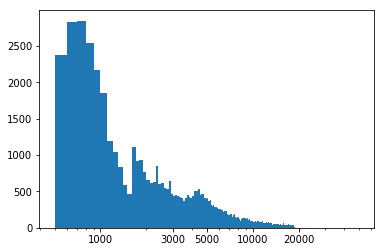

In [8]:
# univariate plot of diamond prices

bins=np.arange(500, 50000, 100)
plt.hist(data=diamonds, x='price', bins=bins);
plt.xscale('log')
x_ticks = [1000, 3000, 5000, 10000, 20000]
plt.xticks(x_ticks, x_ticks);
#distribution skewed to the left 

Price distribution comment 1: Diamond price follows a highly skewed distribution. Reason for a log scale.

Price distribution comment 2: Under a log scale, the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

Next, creating a plot of first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

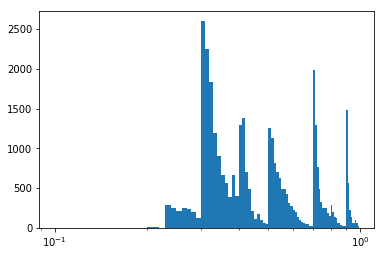

In [9]:
# univariate plot of carat weights
bins = np.arange(0.1, 1, 0.01)
plt.hist(data=diamonds, x='carat', bins=bins);
plt.xscale('log')

Distribution comment: There's an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data I have tend to be higher on the quality scale, or lower?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


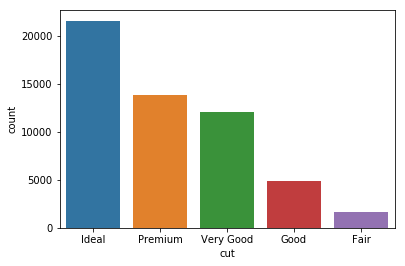

In [10]:
# univariate plots of cut, color, and clarity grades
ordered_cat=['Ideal','Premium','Very Good', 'Good', 'Fair']
diamonds['cut'] = diamonds['cut'].astype('category', ordered = True, categories = ordered_cat)
sb.countplot(data=diamonds, x='cut');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


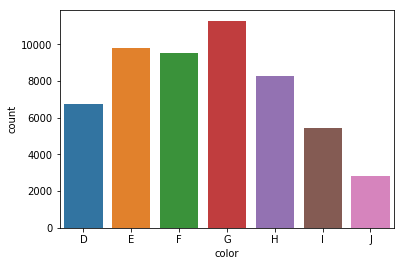

In [11]:
#color distribution:
ordered_cat2=['D', 'E', 'F', 'G', 'H', 'I', 'J']
diamonds['color'] = diamonds['color'].astype('category', ordered = True, categories = ordered_cat2)
sb.countplot(data=diamonds, x='color');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until


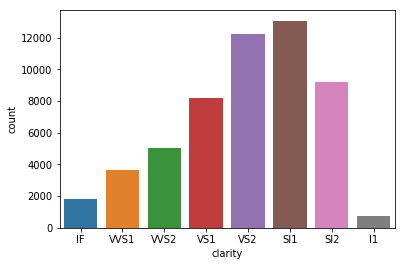

In [12]:
#Clarity distribution:
ordered_cat=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
diamonds['clarity'] = diamonds['clarity'].astype('category', ordered = True, categories = ordered_cat)
sb.countplot(data=diamonds, x='clarity');

General categorical feature comment: Since these features are categorical now, and ordinal in nature, the bars should be sorted in order of increasing quality level. 

Cut distribution comment: The bar chart shows that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.

Color distribution comment: The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G.

Clarity distribution comment: There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).